# Name: Sushilkumar Patil

# Task2: Prediction Using Unsupervised ML

Aim:  

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# Loading Data

In [2]:
d=datasets.load_iris()

In [3]:
d=pd.DataFrame(d.data, columns=d.feature_names)
d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
d.shape

(150, 4)

### Checking for null values

In [6]:
d.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

No Null values

### Dropping duplicates

In [7]:
d.drop_duplicates(inplace=True)
d.shape

(149, 4)

Dropped One Duplicate record

### Checking Outlier and it's treatment

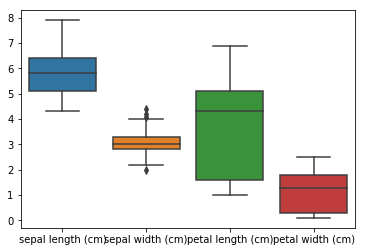

In [8]:
sns.boxplot(data=d)

In [9]:
for col in d.columns:
    percentiles = d[col].quantile([0.01,0.99]).values
    d[col][d[col] <= percentiles[0]] = percentiles[0]
    d[col][d[col] >= percentiles[1]] = percentiles[1]

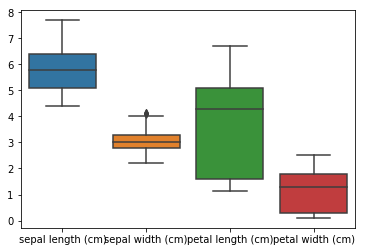

In [10]:
sns.boxplot(data=d)

### Data Transformation

In [11]:
d.skew()

sepal length (cm)    0.300565
sepal width (cm)     0.266736
petal length (cm)   -0.266768
petal width (cm)    -0.090076
dtype: float64

In [12]:
d['sepal length (cm)']=np.log(d['sepal length (cm)'])
d['sepal width (cm)']=np.sqrt(d['sepal width (cm)'])
d['petal length (cm)']=np.square(d['petal length (cm)'])

In [13]:
d.skew()

sepal length (cm)    0.041771
sepal width (cm)     0.077018
petal length (cm)    0.182021
petal width (cm)    -0.090076
dtype: float64

### Optimum Number of Clusters for KMeans is Calculated as: 

In [14]:
from sklearn.cluster import KMeans

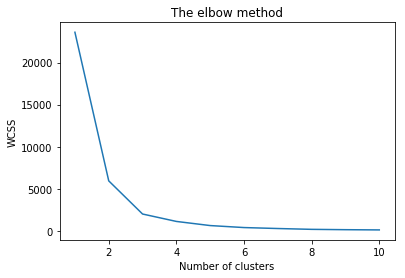

In [15]:
x = d.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We can see that Elbow has occured at n=3. Hence, Optimum number of Cluster equals 3. 

This is point Where, Within Cluster Sum of Square (WCSS) doesnt decrease Significantly.

# Fitting Of Model

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

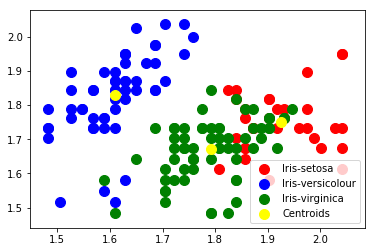

In [17]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

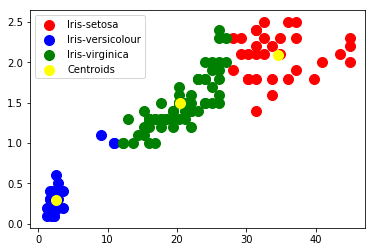

In [18]:
# Visualising the clusters - On the Last two columns

plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()